In [2]:
# import libraries

import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.2
numpy version: 1.25.2
seaborn version: 0.12.2


### use axample data from "An Introduction to Statistical Learning" 
- Teach by Aj.Prasert by using avertising.csv file

In [4]:
df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


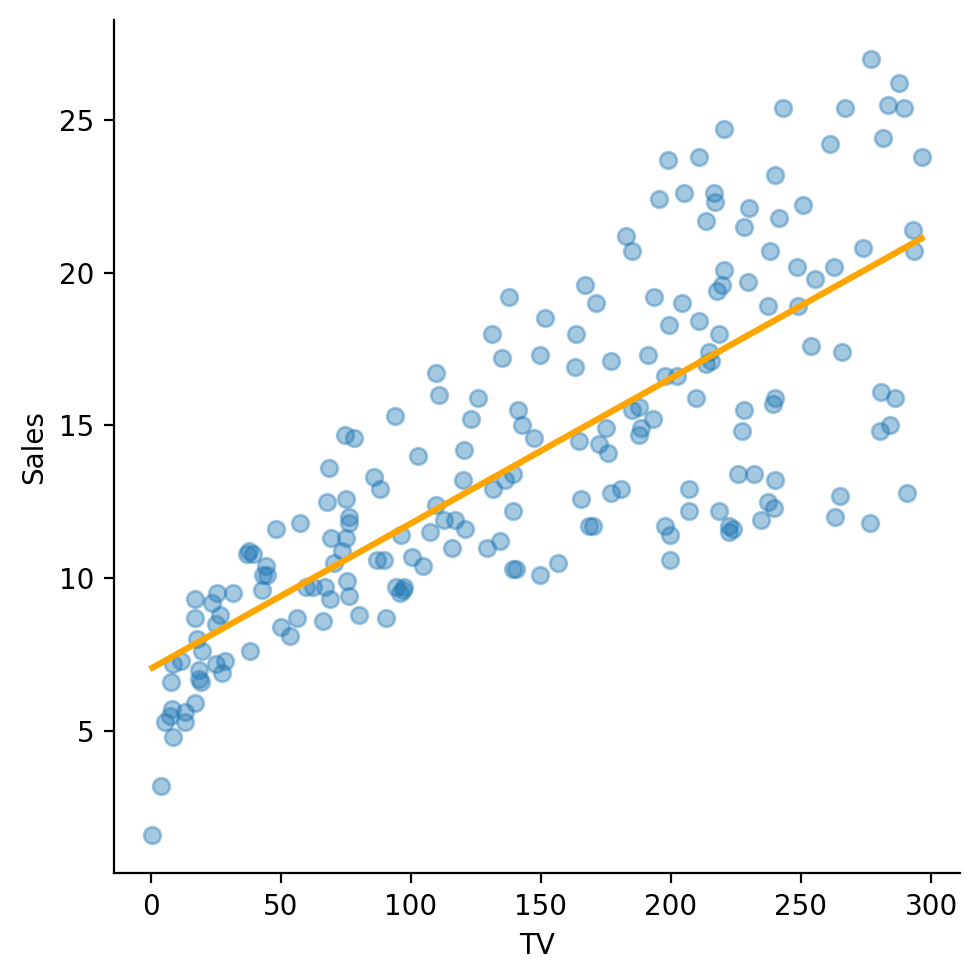

In [8]:
# plot relationship using linear model to see between sale and tv

sns.lmplot(data = df, x = 'TV', y = 'Sales', ci = None, scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'orange'})

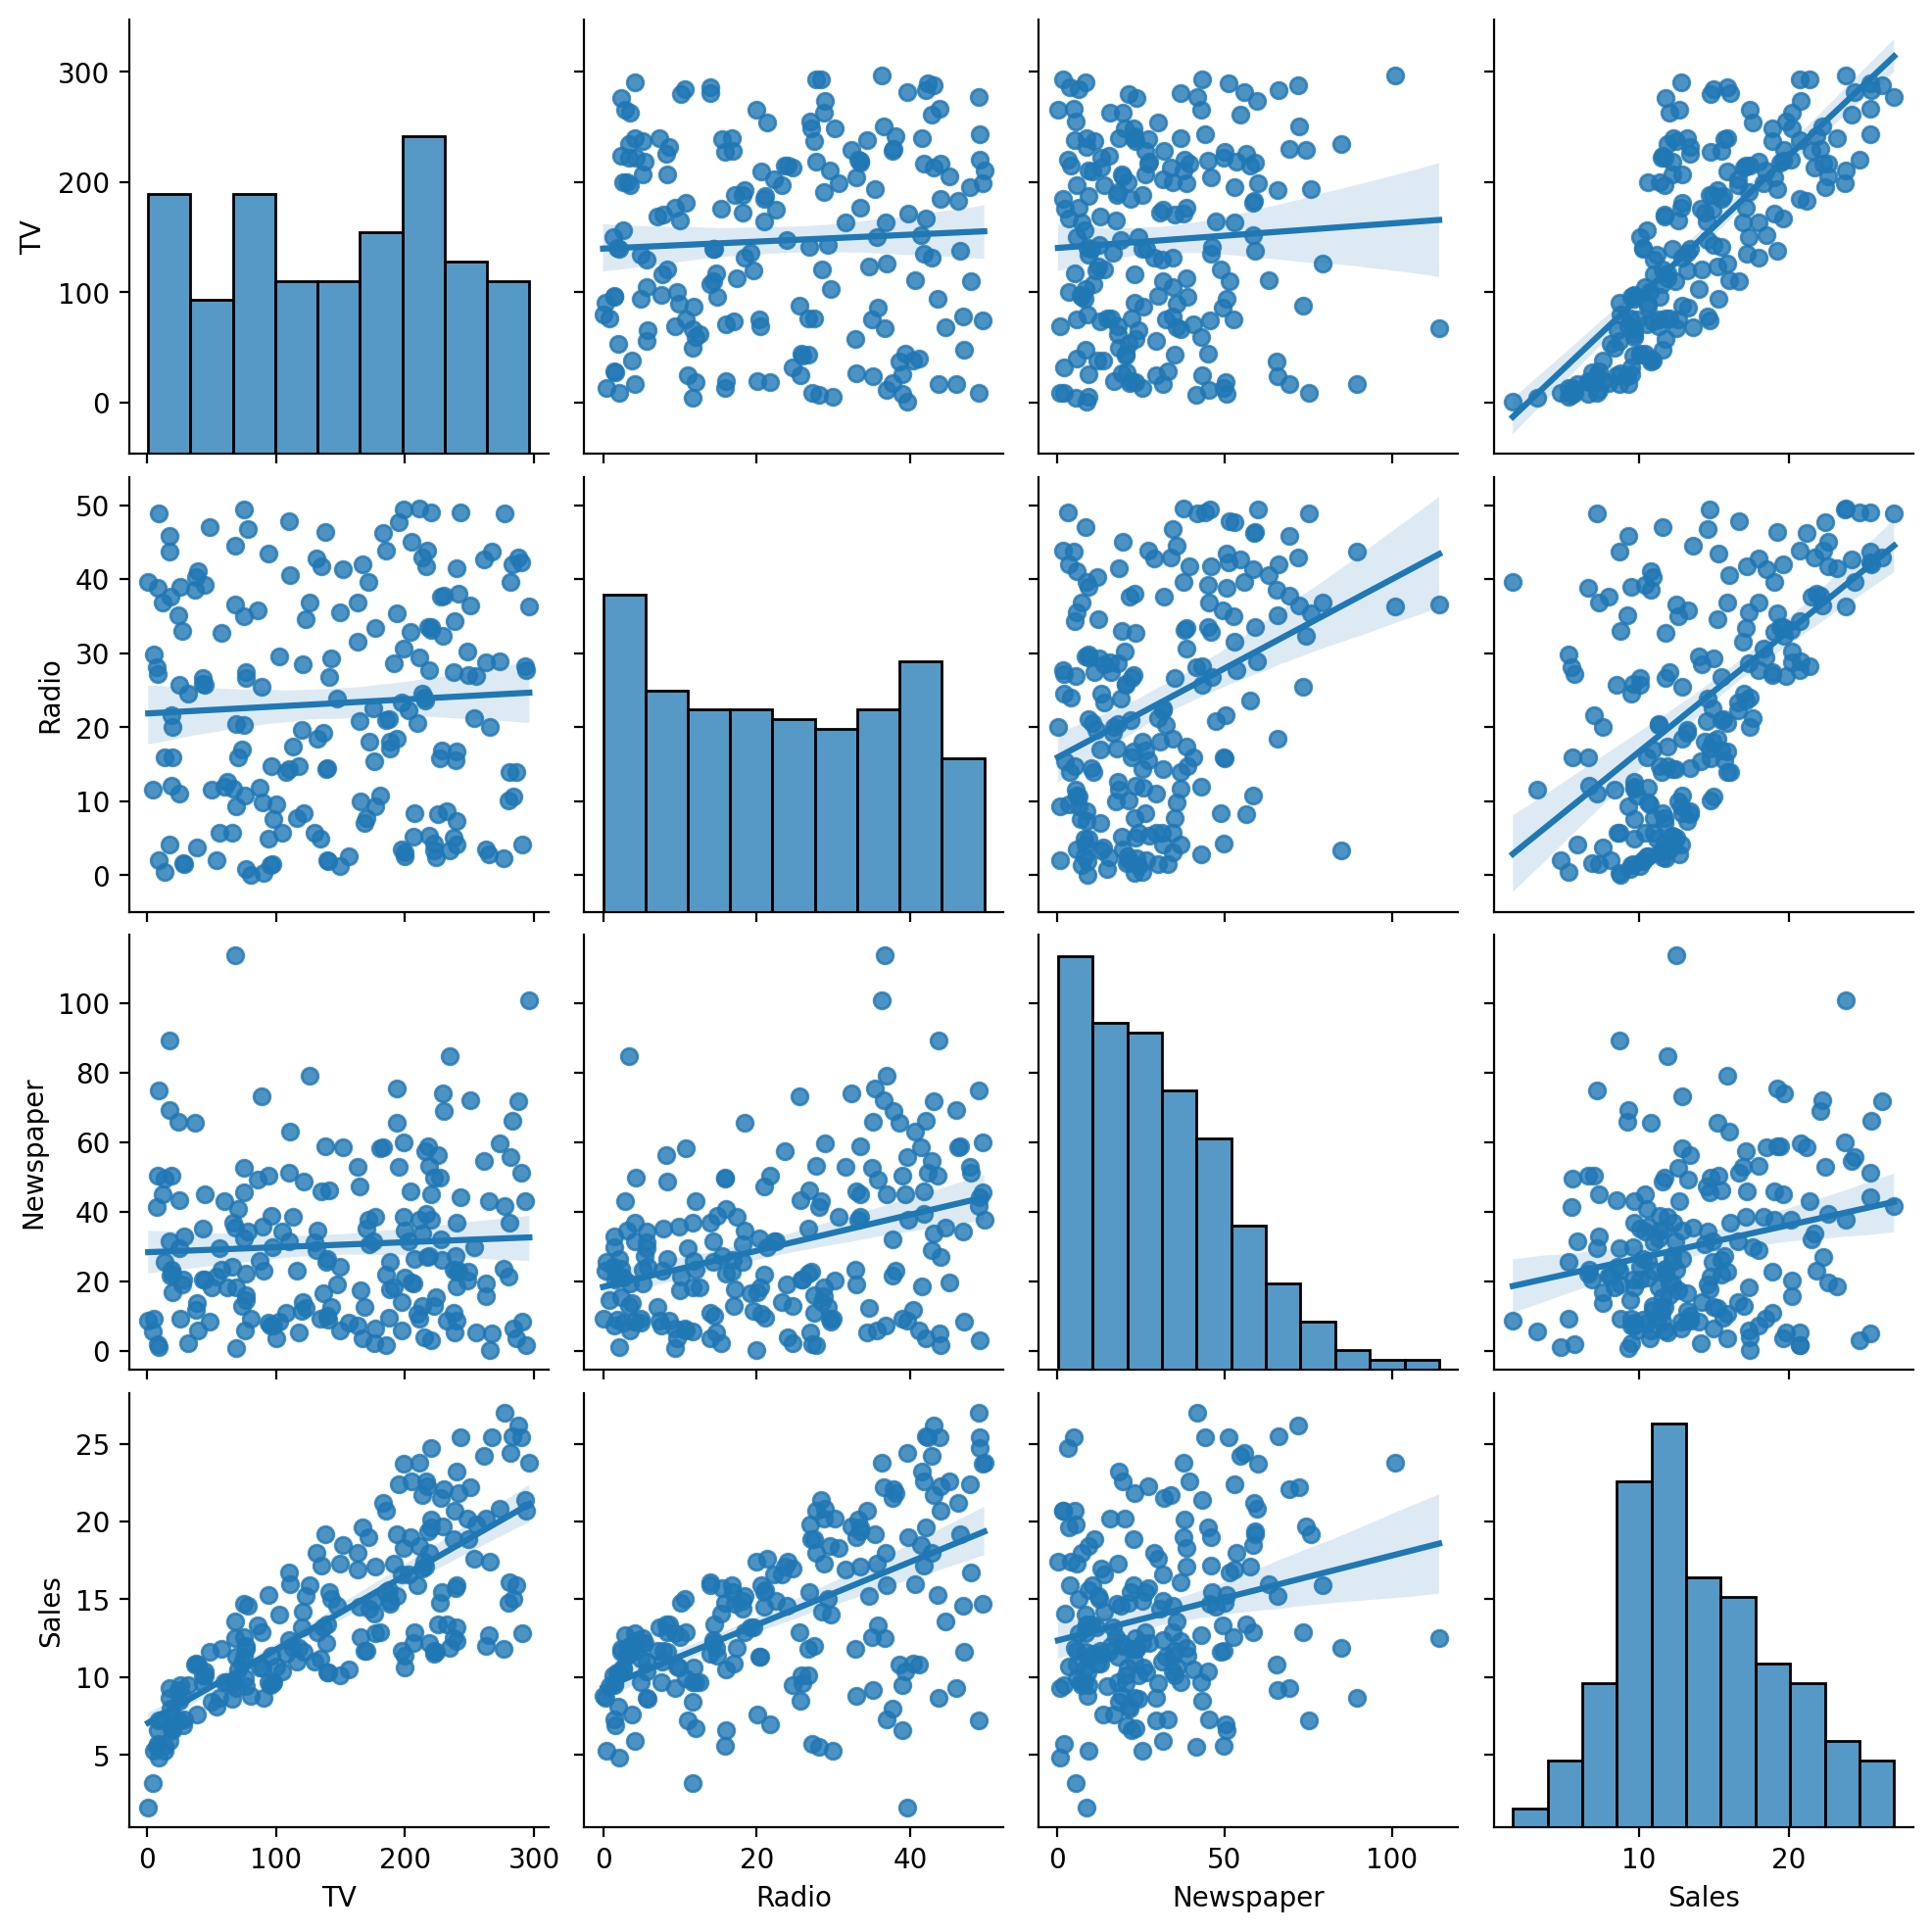

In [9]:
# as we have only 4 variables, so let's see the pair plot

sns.pairplot(df, kind = 'reg')

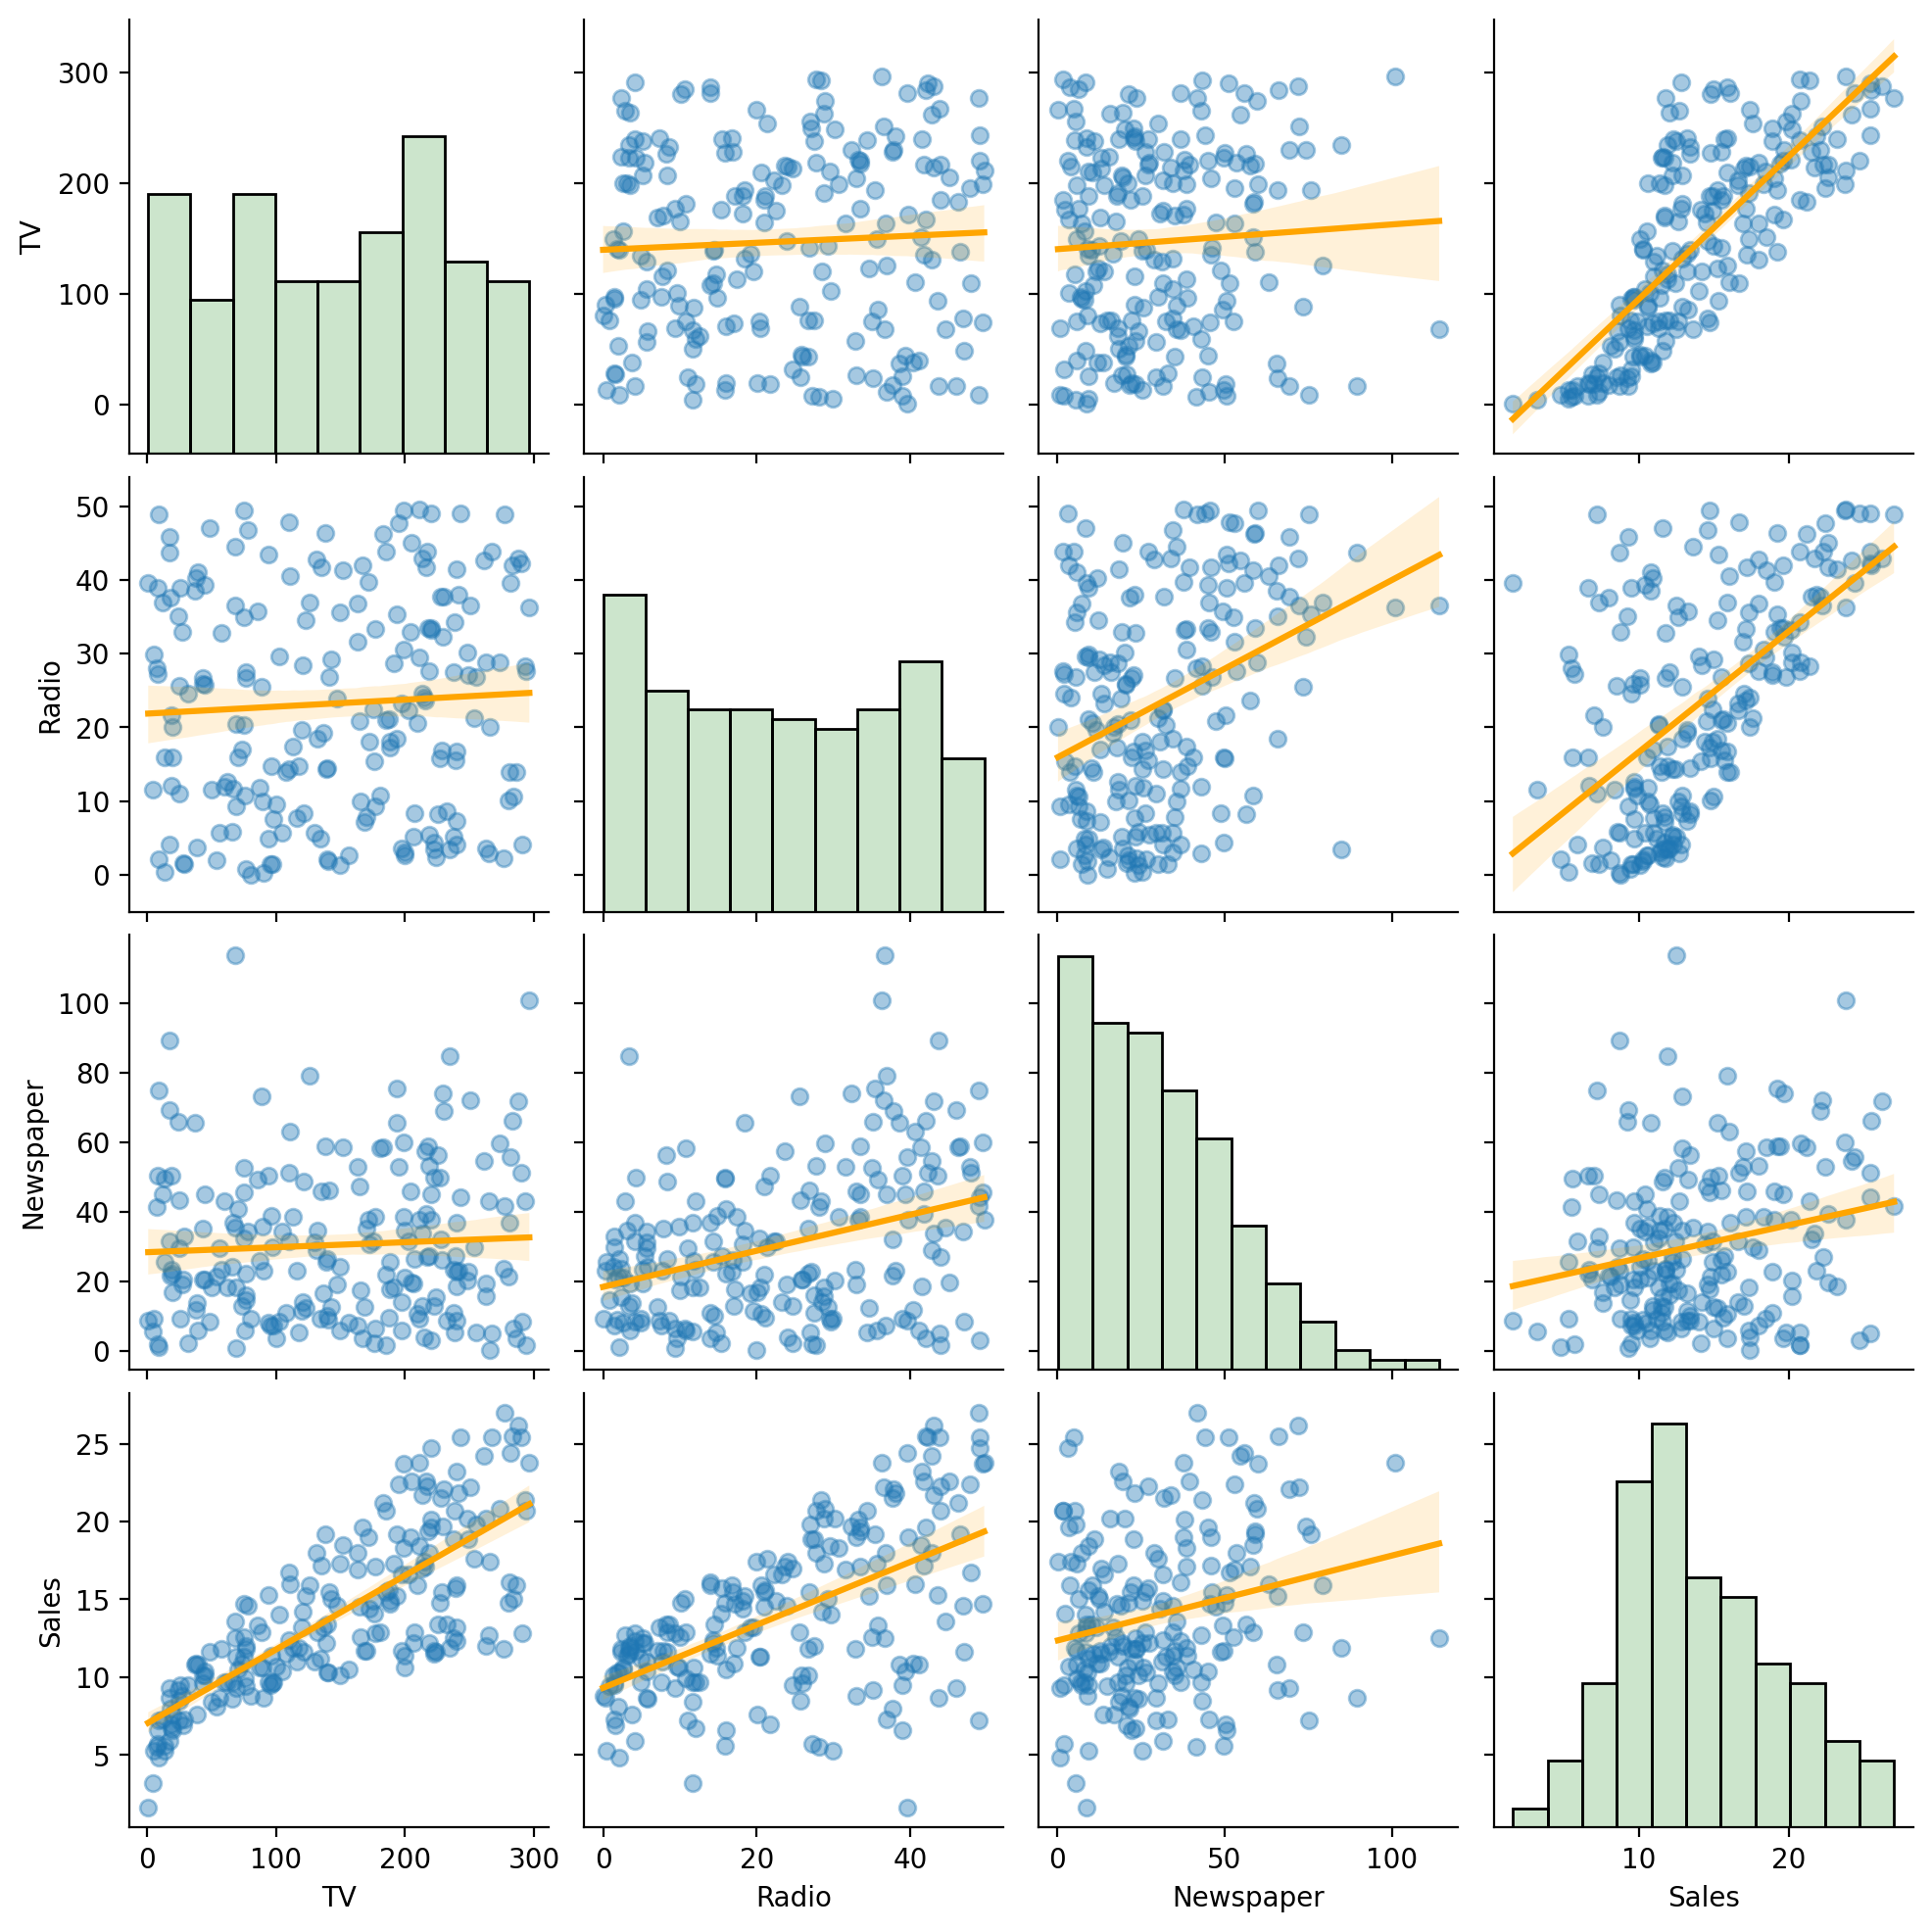

In [10]:
# define our setting

sns.pairplot(df, kind = 'reg', plot_kws = {'scatter_kws': {'alpha': 0.4}, 'line_kws': {'color': 'orange'}}, diag_kws = {'color': 'green', 'alpha': 0.2});

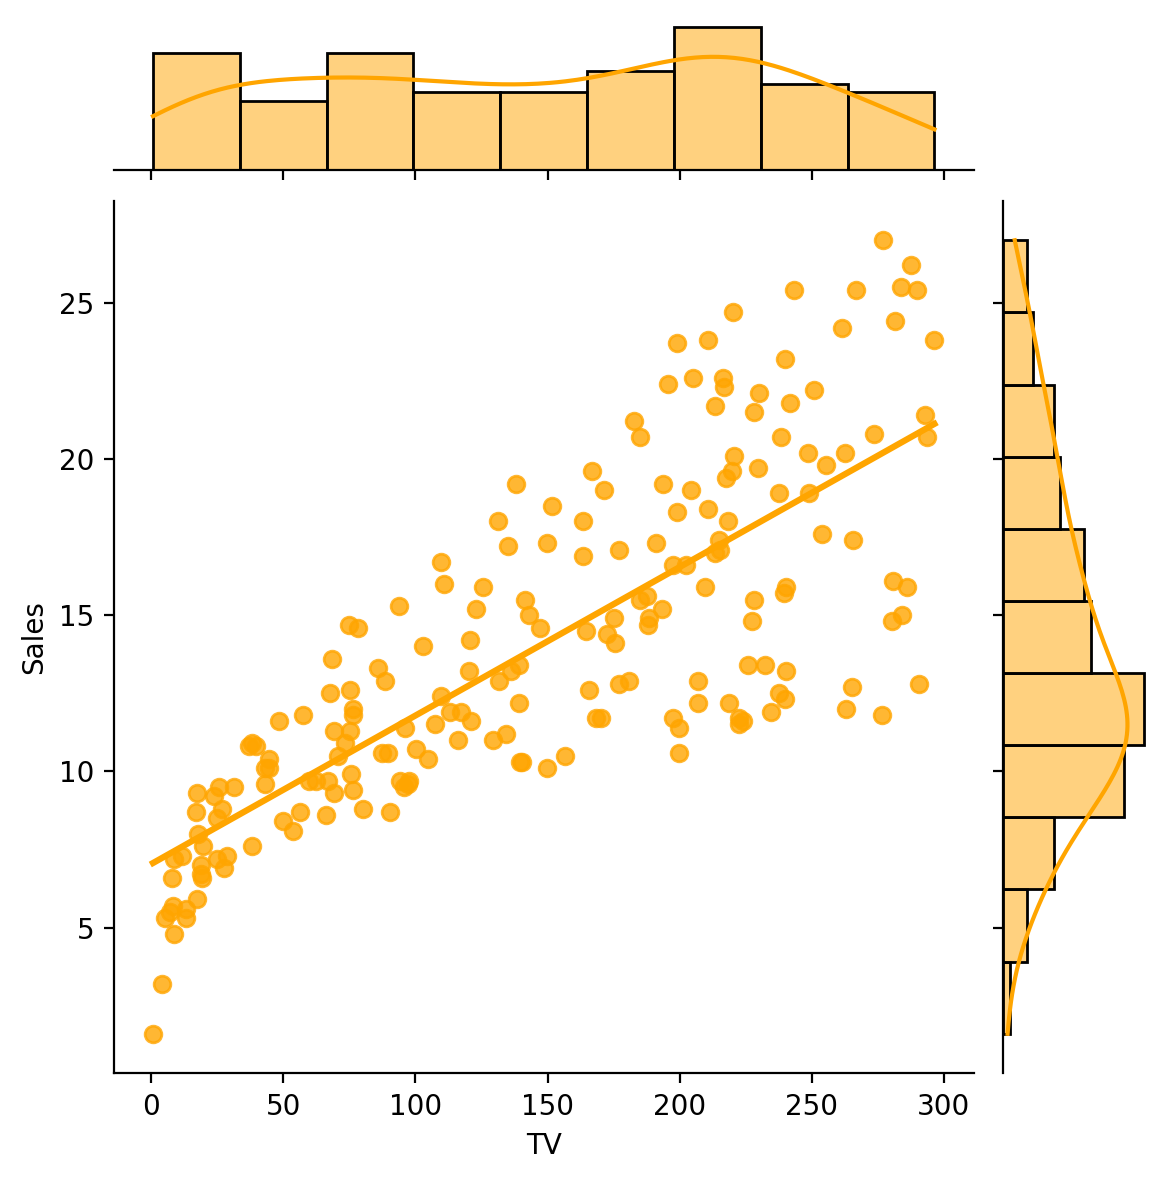

In [11]:
sns.jointplot(data = df, x = 'TV', y = 'Sales', kind = 'reg', ci = None, color = 'orange')

### sklearn: Linear Regression

In [12]:
# import libraries

import sklearn 
from sklearn.linear_model import LinearRegression

In [13]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.0


In [14]:
model = LinearRegression() # create a model
model

LinearRegression()

In [15]:
len(df)

200

In [16]:
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [17]:
x1 = df[['TV', 'Radio', 'Newspaper']]
y1 = df['Sales']

In [18]:
x = sm.add_constant(x1)
x.tail(10)

,const,TV,Radio,Newspaper
191,1.0,39.5,41.1,5.8
192,1.0,75.5,10.8,6.0
193,1.0,17.2,4.1,31.6
194,1.0,166.8,42.0,3.6
195,1.0,149.7,35.6,6.0
196,1.0,38.2,3.7,13.8
197,1.0,94.2,4.9,8.1
198,1.0,177.0,9.3,6.4
199,1.0,283.6,42.0,66.2
200,1.0,232.1,8.6,8.7


In [21]:
results = sm.OLS(y1, x).fit()
results

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.58e-96
Time:                        05:56:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [ ]:
# refer to P-value, we can exclude Newspaper variable

In [23]:
# training data set

X = df.drop(columns = ['Newspaper','Sales'])[:140]
X.tail(3)

,TV,Radio
138,273.7,28.9
139,43.0,25.9
140,184.9,43.9


In [24]:
len(X)

140

In [25]:
y = df['Sales'].iloc[:140]

In [26]:
y.loc[0:3] # using loc to get required data

1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64

In [27]:
len(y)

140

In [28]:
# train a model

model.fit(X, y)

LinearRegression()

In [29]:
# get R-squared score

model.score(X, y)

0.8935667516127374

In [30]:
model.intercept_

2.988088409316557

In [31]:
X.head()

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8


In [32]:
model.coef_ # get X's coeficient

array([0.04705827, 0.17799117])

In [33]:
model.predict([[200, 40]]) # predict y (Sales) value when x = [200, 40]

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.51938875])

In [34]:
model.predict([
    [200, 40],
    [100, 80],
    [40, 20]
])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.51938875, 21.93320896,  8.43024255])

In [35]:
# get test set from df

X_test = df.drop(columns = ['Newspaper', 'Sales'])[140:]
X_test.tail(3)

,TV,Radio
198,177.0,9.3
199,283.6,42.0
200,232.1,8.6


In [36]:
y_hat = model.predict(X_test) # feed each X to predict y
y_hat

array([ 9.46801516, 18.40416227, 19.27374325,  8.92493284, 10.14936307,
        9.92854651, 15.58611391, 23.15422645, 11.94934683,  9.68376521,
       18.67142129, 10.17726458, 16.43399632, 18.11541913, 15.58124472,
        5.24572491, 15.14947572, 10.26880535, 10.10654442, 12.46069977,
       14.32727972, 13.39306589, 15.07550617, 17.23219025, 11.11978756,
       14.62842204, 10.5228995 , 13.64529215, 17.32503083, 18.25346019,
        7.40569937, 14.44918887,  7.48805302, 12.17643792, 14.05901701,
       24.72229093, 20.05269539, 12.38573662, 16.41849062, 12.56084917,
       10.82019009, 14.23147211,  6.64731271, 24.17566647, 18.72268859,
       20.66243507,  9.92649814, 17.08926992, 18.92083011,  6.0217712 ,
       12.16232717,  8.46329225,  4.52725441, 18.31303663, 16.36919676,
        5.44428155,  8.29313392, 12.9727196 , 23.80944223, 15.4410363 ])

In [37]:
len(y_hat)

60

In [38]:
dc = pd.concat([df[140:].reset_index(), pd.Series(y_hat, name = 'predicted')], axis = 'columns') # for beautiful view data that we will see the real y (Sales) and the predicted values
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,141,73.4,17.0,12.9,10.9,9.468015
1,142,193.7,35.4,75.6,19.2,18.404162
2,143,220.5,33.2,37.9,20.1,19.273743
3,144,104.6,5.7,34.4,10.4,8.924933
4,145,96.2,14.8,38.9,11.4,10.149363
5,146,140.3,1.9,9.0,10.3,9.928547
6,147,240.1,7.3,8.7,13.2,15.586114
7,148,243.2,49.0,44.3,25.4,23.154226
8,149,38.0,40.3,11.9,10.9,11.949347
9,150,44.7,25.8,20.6,10.1,9.683765


### another mothod: using Statsmodel: Multiple Linear Regression
- Statsmodel provides more details that sklearn

In [ ]:
# !pip install statsmodels

In [40]:
# import libraries

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
# formula: response - predictor1 + predictor2

model_a = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df[:140]).fit() # to get model in R style

In [42]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           5.60e-66
Time:                        06:04:44   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [43]:
model_a.params # get coef

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [44]:
model_a.pvalues # views more digit of p-value

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

In [45]:
model.intercept_ # sklearn

2.988088409316557

In [46]:
model.coef_

array([0.04705827, 0.17799117])

In [47]:
# as the statsmodels show, we can see the p-value of Newspaper = 0.669 which is not significant. Then we can drop this colum

model_a = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()
model_a

In [48]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           4.83e-98
Time:                        06:05:22   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0